In [1]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
from scipy.stats import powerlaw
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib notebook
import math
#from iminuit import Minuit
from scipy.constants import c
from scipy.optimize import minimize, rosen, rosen_der
import decimal
#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.tools import FigureFactory as FF
from matplotlib.legend_handler import HandlerLine2D

In [54]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
def phaseshift_linear(distance_kpc, spinPeriod_s, EnergyScale_GeV, trueEnergy_GeV):
    shift_linear=distance_kpc*1.02927125*(10**11)*trueEnergy_GeV/(spinPeriod_s * EnergyScale_GeV)
    return shift_linear

def phaseshift_quadratic(distance_kpc, spinPeriod_s, EnergyScale_GeV, trueEnergy_GeV):
    shift_quadratic=(1.5* distance_kpc*1.02927125*(10**11)*trueEnergy_GeV**2/(spinPeriod_s * (EnergyScale_GeV**2)))
    return shift_quadratic

In [3]:
phaseshift_linear(5.3,0.8,1.220890*10**19,10000)
phaseshift_quadratic(5.3,0.8,1.220890*10**19,10000)

6.862050512330162e-19

In [4]:
number_of_events=1000000
bin_number=100
phase_width=0.045
Emax= 10000
Emin= 100
spectral_index=-3.0
distance=2.9
spin_period=0.033
planck_scale=2*10**17
energy_scale=10**10

In [13]:
sigma_crab = phase_width/6
sigma_crab

0.0075

In [14]:
#line=np.zeros(number_of_events)
line=np.empty(number_of_events); line.fill(0.5)


In [15]:
####Create Gaussian like random events

mu, sigma = 0.5, sigma_crab # mean and standard deviation
pulse_crabP2= np.random.normal(mu, sigma, number_of_events)



In [126]:
np.fromfunction(lambda y,x: x**(-1), (1, 100))
#plt.hist(np.random.power(3, 1000))


<ipython-input-126-8f9ac6855706>:1: RuntimeWarning: divide by zero encountered in reciprocal
  np.fromfunction(lambda y,x: x**(-1), (1, 100))


array([[       inf, 1.        , 0.5       , 0.33333333, 0.25      ,
        0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
        0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857,
        0.06666667, 0.0625    , 0.05882353, 0.05555556, 0.05263158,
        0.05      , 0.04761905, 0.04545455, 0.04347826, 0.04166667,
        0.04      , 0.03846154, 0.03703704, 0.03571429, 0.03448276,
        0.03333333, 0.03225806, 0.03125   , 0.03030303, 0.02941176,
        0.02857143, 0.02777778, 0.02702703, 0.02631579, 0.02564103,
        0.025     , 0.02439024, 0.02380952, 0.02325581, 0.02272727,
        0.02222222, 0.02173913, 0.0212766 , 0.02083333, 0.02040816,
        0.02      , 0.01960784, 0.01923077, 0.01886792, 0.01851852,
        0.01818182, 0.01785714, 0.01754386, 0.01724138, 0.01694915,
        0.01666667, 0.01639344, 0.01612903, 0.01587302, 0.015625  ,
        0.01538462, 0.01515152, 0.01492537, 0.01470588, 0.01449275,
        0.01428571, 0.01408451, 0.01388889, 0.01

In [141]:
def pulsar_array_creater(E):
    pulsar =((2.0)*10**-11)*pow(np.divide(E,150),-3.)
    return pulsar

def rndm(a, b, g_1, size=1):
    """Power-law gen for pdf(x)\propto x^{g-1} for a<=x<=b"""
    r = np.random.random(size=size)
    g=g_1
    ag, bg = a**g, b**g
    return (ag + (bg - ag)*r)**(1./g)

energy_crabP2 = rndm(Emin, Emax, g_1=spectral_index+1, size=number_of_events)

energy_crabP2

array([221.40342908, 140.12875167, 112.74051689, ..., 201.97444039,
       208.63325961, 409.07472218])

(array([2.10480e+05, 1.65799e+05, 1.30730e+05, 1.03760e+05, 8.20990e+04,
        6.46190e+04, 5.10680e+04, 4.02480e+04, 3.17260e+04, 2.48730e+04,
        1.98100e+04, 1.55920e+04, 1.25130e+04, 9.90300e+03, 7.63300e+03,
        6.21700e+03, 4.81100e+03, 3.86200e+03, 2.95000e+03, 2.41100e+03,
        1.85900e+03, 1.51300e+03, 1.24300e+03, 9.45000e+02, 7.05000e+02,
        5.18000e+02, 4.77000e+02, 3.60000e+02, 2.93000e+02, 2.35000e+02,
        1.86000e+02, 1.40000e+02, 1.04000e+02, 8.50000e+01, 7.30000e+01,
        4.50000e+01, 4.60000e+01, 3.70000e+01, 3.10000e+01]),
 array([ 100.00003154,  112.51858163,  126.60427218,  142.4532864 ,
         160.28636678,  180.35188955,  202.92932405,  228.33312511,
         256.91711272,  289.0794    ,  325.26793806,  365.98675495,
         411.80297572,  463.35472123,  521.35999577,  586.62668738,
         660.06381988,  742.6942137 ,  835.66873149,  940.28230718,
        1057.99198161, 1190.43719594, 1339.46262553, 1507.14387228,
        1695.816373

Text(0.5, 0, 'Energy (GeV)')

Text(0, 0.5, 'Counts / bin')

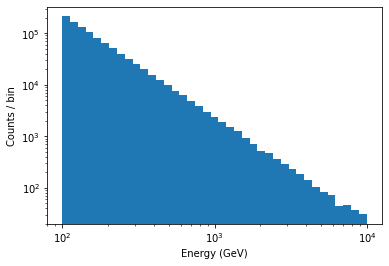

In [140]:
#cc=np.arange(100,1000, number_of_events)

plt.hist(energy_crabP2,bins=np.logspace(np.log10(np.amin(energy_crabP2)),np.log10(np.amax(energy_crabP2)),40))
plt.xlabel('Energy (GeV)')
plt.ylabel('Counts / bin')
plt.xscale('log')
plt.yscale('log')


In [113]:
g = vectorize(cc)
m = fromfunction(g, (1,10))

NameError: name 'vectorize' is not defined

In [55]:
actualP2= pulsar_array_creater(np.arange(100,10000,1))
np.logspace(np.log10(np.amin(energy_crabP2)),np.log10(np.amax(energy_crabP2)),40)
np.logspace(np.log10(np.amin(actualP2)),np.log10(np.amax(actualP2)),40)


array([ 100.00000529,  108.91435686,  118.62336503,  129.19786827,
        140.71501985,  153.25885077,  166.92088281,  181.80079636,
        198.00715764,  215.65821087,  234.88274095,  255.82101314,
        278.62579643,  303.46347817,  330.51527806,  359.97857037,
        392.068324  ,  427.01867094,  465.08461451,  506.54388994,
        551.69899074,  600.87937577,  654.44387299,  712.78329755,
        776.32330325,  845.52748814,  920.90077704, 1002.99310555,
       1092.40343245, 1189.7841098 , 1295.84564263, 1411.36187287,
       1537.17562545, 1674.20485766, 1823.44935674, 1985.99803445,
       2163.036872  , 2355.8575731 , 2565.86698849, 2794.59738049])

array([7.12713793e-17, 1.01568252e-16, 1.44744073e-16, 2.06273578e-16,
       2.93958766e-16, 4.18918200e-16, 5.96996852e-16, 8.50775264e-16,
       1.21243277e-15, 1.72782789e-15, 2.46231320e-15, 3.50902212e-15,
       5.00067833e-15, 7.12642521e-15, 1.01558095e-14, 1.44729599e-14,
       2.06252951e-14, 2.93929370e-14, 4.18876308e-14, 5.96937153e-14,
       8.50690186e-14, 1.21231153e-13, 1.72765511e-13, 2.46206697e-13,
       3.50867122e-13, 5.00017826e-13, 7.12571257e-13, 1.01547939e-12,
       1.44715126e-12, 2.06232326e-12, 2.93899977e-12, 4.18834420e-12,
       5.96877459e-12, 8.50605117e-12, 1.21219030e-11, 1.72748234e-11,
       2.46182076e-11, 3.50832035e-11, 4.99967824e-11, 7.12500000e-11])

[7.12500000e-11 6.91545480e-11 6.71404663e-11 ... 7.13141635e-17
 7.12927671e-17 7.12713793e-17]


In [68]:
check=((5.7)*10**-10)*pow(np.divide(np.arange(1,100,1),50),-3.)
check

array([7.12500000e-05, 8.90625000e-06, 2.63888889e-06, 1.11328125e-06,
       5.70000000e-07, 3.29861111e-07, 2.07725948e-07, 1.39160156e-07,
       9.77366255e-08, 7.12500000e-08, 5.35311796e-08, 4.12326389e-08,
       3.24305872e-08, 2.59657434e-08, 2.11111111e-08, 1.73950195e-08,
       1.45023407e-08, 1.22170782e-08, 1.03878116e-08, 8.90625000e-09,
       7.69355361e-09, 6.69139745e-09, 5.85600395e-09, 5.15407986e-09,
       4.56000000e-09, 4.05382340e-09, 3.61987502e-09, 3.24571793e-09,
       2.92139899e-09, 2.63888889e-09, 2.39166191e-09, 2.17437744e-09,
       1.98263628e-09, 1.81279259e-09, 1.66180758e-09, 1.52713477e-09,
       1.40662942e-09, 1.29847645e-09, 1.20113286e-09, 1.11328125e-09,
       1.03379231e-09, 9.61694201e-10, 8.96147509e-10, 8.36424681e-10,
       7.81893004e-10, 7.32000493e-10, 6.86264123e-10, 6.44259983e-10,
       6.05615007e-10, 5.70000000e-10, 5.37123731e-10, 5.06727924e-10,
       4.78582991e-10, 4.52484377e-10, 4.28249437e-10, 4.05714741e-10,
      

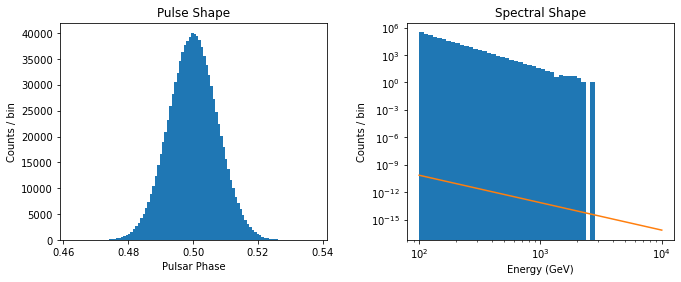

In [34]:


plt.figure(figsize=(11, 4))
plt.subplot(121)
count, bins, ignored = plt.hist(pulse_crabP2, bin_number, density=False)
plt.xlabel('Pulsar Phase')
plt.ylabel('Counts / bin')
plt.title('Pulse Shape')

plt.subplot(122)
#count, bins, ignored = plt.hist(energy_crabP2, bin_number, density=True)
plt.hist(energy_crabP2,bins=np.logspace(np.log10(np.amin(energy_crabP2)),np.log10(np.amax(energy_crabP2)),40))
plt.plot(np.arange(100,10000,1),pulsar_array_creater(np.arange(100,10000,1)))
plt.xlabel('Energy (GeV)')
plt.ylabel('Counts / bin')
plt.xscale('log')
plt.yscale('log')
plt.title('Spectral Shape')
plt.subplots_adjust(wspace=0.3)
#plt.suptitle('Phase/Time shift for NORMAL PULSARS due to Linear LIV effect ($E_{QG_1}$ = Planck Energy)')
#plt.savefig('msp_linear.png')

#plt.savefig('Crablikeshapes.png', dpi=300,  bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

Text(0.5, 1.0, 'Spectral Shape')

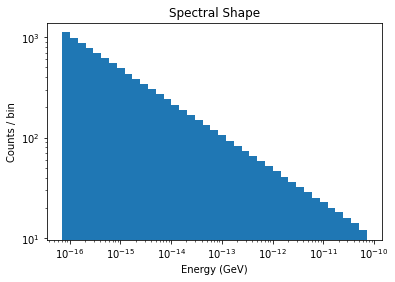

In [51]:
#plt.hist(np.arange(100,10000,1),pulsar_array_creater(np.arange(100,10000,1)),)
#plt.hist(pulsar_array_creater(np.arange(100,10000,1)),bins=np.logspace(np.log10(pulsar_array_creater(np.arange(100,10000,1))),np.log10(pulsar_array_creater(np.arange(100,10000,1))),40))

plt.hist(pulsar_array_creater(np.arange(100,10000,1)),bins=np.logspace(np.log10(np.amin(actualP2)),np.log10(np.amax(actualP2)),40))                          
plt.xlabel('Energy (GeV)')
plt.ylabel('Counts / bin')
plt.xscale('log')
plt.yscale('log')
plt.title('Spectral Shape')

In [12]:
line_linear_sublum_planck=line+phaseshift_linear(distance,spin_period,1.220890*planck_scale,energy_crabP2)
line_linear_superlum_planck=line-phaseshift_linear(distance,spin_period,1.220890*planck_scale,energy_crabP2)
line_quadratic_sublum_planck=line+phaseshift_quadratic(distance,spin_period,1.220890*planck_scale*2.5*10**-7,energy_crabP2)
line_quadratic_superlum_planck=line-phaseshift_quadratic(distance,spin_period,1.220890*planck_scale*2.5*10**-7,energy_crabP2)

pulse_linear_sublum_planck=pulse_crabP2+phaseshift_linear(distance,spin_period,1.220890*planck_scale,energy_crabP2)
pulse_linear_superlum_planck=pulse_crabP2-phaseshift_linear(distance,spin_period,1.220890*planck_scale,energy_crabP2)
pulse_quadratic_sublum_planck=pulse_crabP2+phaseshift_quadratic(distance,spin_period,1.220890*planck_scale*2.5*10**-7,energy_crabP2)
pulse_quadratic_superlum_planck=pulse_crabP2-phaseshift_quadratic(distance,spin_period,1.220890*planck_scale*2.5*10**-7,energy_crabP2)

In [88]:
1.220890*planck_scale*2.5*10**-7

61044500000.0

In [ ]:
pulsargroup_linear_sublum_planck=line+phaseshift_linear(distance,spin_period,1.220890*planck_scale,energy_crabP2)
line_linear_superlum_planck=line-phaseshift_linear(distance,spin_period,1.220890*planck_scale,energy_crabP2)
line_quadratic_sublum_planck=line+phaseshift_quadratic(distance,spin_period,1.220890*planck_scale*2.5*10**-7,energy_crabP2)
line_quadratic_superlum_planck=line-phaseshift_quadratic(distance,spin_period,1.220890*planck_scale*2.5*10**-7,energy_crabP2)

def pulsar_linear_Planck(E):
    pulsar =((5.7)*10**-10)*pow(np.divide(E,50),-3.)
    return pulsar


<Figure size 1800x1800 with 0 Axes>

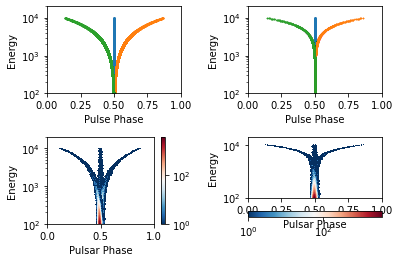

In [13]:
plt.figure(figsize=(25, 25))
plt.subplots(nrows=2, ncols=2)
plt.subplot(221)
plt.plot(line,energy_crabP2,'o',markersize=1)
plt.plot(line_linear_sublum_planck,energy_crabP2,'o',markersize=1)
plt.plot(line_linear_superlum_planck,energy_crabP2,'o',markersize=1)

#plt.title("Shift Linear LIV effect ($E_{QG_1}$ = Planck E)")
plt.xlabel('Pulse Phase')
plt.ylabel('Energy')
plt.yscale('log')
plt.xlim(0.,1.)
plt.ylim(100,2*10**4)

plt.subplot(222)

plt.plot(line,energy_crabP2,'o',markersize=1)
plt.plot(line_quadratic_sublum_planck,energy_crabP2,'o',markersize=0.5)
plt.plot(line_quadratic_superlum_planck,energy_crabP2,'o',markersize=0.5)

#plt.title("Shift Quadratic LIV effect ($E_{QG_1}$ = Planck E)")
plt.xlabel('Pulse Phase')
plt.ylabel('Energy')
plt.yscale('log')
plt.xlim(0.,1.)
plt.ylim(100,2*10**4)
plt.subplots_adjust(wspace=0.5)

plt.subplot(223)
plt.hist2d(pulse_crabP2,energy_crabP2,1000, norm=colors.LogNorm(),cmap='RdBu_r')

#plt.figure(figsize=(7, 17))
plt.hist2d(pulse_linear_sublum_planck,energy_crabP2, 1000, norm=colors.LogNorm(),cmap='RdBu_r')
plt.hist2d(pulse_linear_superlum_planck,energy_crabP2, 1000, norm=colors.LogNorm(),cmap='RdBu_r')

plt.xlim(0.,1.)
plt.yscale('log')
plt.xlabel('Pulsar Phase')
plt.ylabel('Energy')
#plt.savefig('linear_msp_sub super.png')
#plt.show()
plt.ylim(100,2*10**4)
plt.colorbar()


plt.subplot(224)

plt.hist2d(pulse_crabP2,energy_crabP2,1000, norm=colors.LogNorm(),cmap='RdBu_r')

#plt.figure(figsize=(7, 17))
plt.hist2d(pulse_quadratic_sublum_planck,energy_crabP2, 1000, norm=colors.LogNorm(),cmap='RdBu_r')
plt.hist2d(pulse_quadratic_superlum_planck,energy_crabP2, 1000, norm=colors.LogNorm(),cmap='RdBu_r')

plt.xlim(0.,1.)
plt.yscale('log')
plt.xlabel('Pulsar Phase')
plt.ylabel('Energy')
#plt.savefig('linear_msp_sub super.png')
#plt.show()
plt.ylim(100,2*10**4)
plt.colorbar(orientation="horizontal", pad=0.15)
plt.subplots_adjust(hspace=0.5)


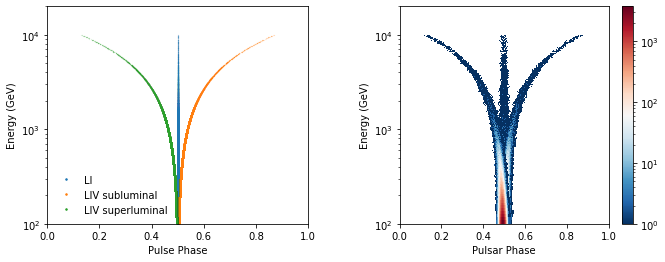

In [81]:
plt.figure(figsize=(11, 4))

#plt.subplots(nrows=1, ncols=2)

#plt.subplots(2,1, gridspec_kw={'width_ratios': [1, 2]})
plt.subplot(121)
plt.plot(line,energy_crabP2,'.',markersize=0.1, label='LI')
plt.plot(line_linear_sublum_planck,energy_crabP2,'.',markersize=0.1, label='LIV subluminal')
plt.plot(line_linear_superlum_planck,energy_crabP2,'.',markersize=0.1, label='LIV superluminal')

#legend = plt.legend(frameon=False)
#for legend_handle in legend.legendHandles:
#    legend_handle._legmarker.set_markersize(9)
plt.legend(markerscale=30,loc=3, frameon=False)
#plt.legend()
#plt.title("Shift Linear LIV effect ($E_{QG_1}$ = Planck E)")
plt.xlabel('Pulse Phase')
plt.ylabel('Energy (GeV)')
plt.yscale('log')
plt.xlim(0.,1.)
plt.ylim(100,2*10**4)


plt.subplot(122)
plt.hist2d(pulse_crabP2,energy_crabP2,1000, norm=colors.LogNorm(),cmap='RdBu_r')
plt.hist2d(pulse_linear_sublum_planck,energy_crabP2, 1000, norm=colors.LogNorm(),cmap='RdBu_r')
plt.hist2d(pulse_linear_superlum_planck,energy_crabP2, 1000, norm=colors.LogNorm(),cmap='RdBu_r')

plt.xlim(0.,1.)
plt.yscale('log')
plt.xlabel('Pulsar Phase')
plt.ylabel('Energy (GeV)')

plt.ylim(100,2*10**4)
plt.subplots_adjust(wspace=0.35)
plt.colorbar() 
plt.savefig('linear_liv_phase_effect.png', dpi=300,  bbox_inches = 'tight', pad_inches = 0)
plt.show()

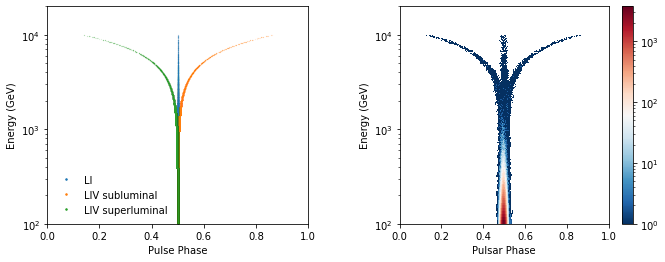

In [80]:
plt.figure(figsize=(11, 4))

#plt.subplots(nrows=1, ncols=2)

#plt.subplots(2,1, gridspec_kw={'width_ratios': [1, 2]})
plt.subplot(121)
plt.plot(line,energy_crabP2,'.',markersize=0.1, label='LI')
plt.plot(line_quadratic_sublum_planck,energy_crabP2,'.',markersize=0.1, label='LIV subluminal')
plt.plot(line_quadratic_superlum_planck,energy_crabP2,'.',markersize=0.1, label='LIV superluminal')

#legend = plt.legend(frameon=False)
#for legend_handle in legend.legendHandles:
#    legend_handle._legmarker.set_markersize(9)
plt.legend(markerscale=30,loc=3, frameon=False)
#plt.legend()
#plt.title("Shift quadratic LIV effect ($E_{QG_1}$ = Planck E)")
plt.xlabel('Pulse Phase')
plt.ylabel('Energy (GeV)')
plt.yscale('log')
plt.xlim(0.,1.)
plt.ylim(100,2*10**4)


plt.subplot(122)
plt.hist2d(pulse_crabP2,energy_crabP2,1000, norm=colors.LogNorm(),cmap='RdBu_r')
plt.hist2d(pulse_quadratic_sublum_planck,energy_crabP2, 1000, norm=colors.LogNorm(),cmap='RdBu_r')
plt.hist2d(pulse_quadratic_superlum_planck,energy_crabP2, 1000, norm=colors.LogNorm(),cmap='RdBu_r')

plt.xlim(0.,1.)
plt.yscale('log')
plt.xlabel('Pulsar Phase')
plt.ylabel('Energy (GeV)')

plt.ylim(100,2*10**4)
plt.subplots_adjust(wspace=0.35)
plt.colorbar() 
plt.savefig('quadratic_liv_phase_effect.png', dpi=300,  bbox_inches = 'tight', pad_inches = 0)
plt.show()

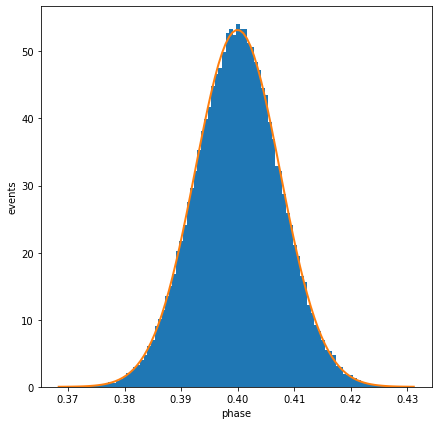

In [96]:
plt.figure(figsize=(7, 7))
count, bins, ignored = plt.hist(pulse_0, bin_number, density=True)
#count, bins, ignored = plt.hist(pulse_1, bin_number, density=True)
#count, bins, ignored = plt.hist(pulse_2, bin_number, density=True)
#count, bins, ignored = plt.hist(pulse_3, bin_number, density=True)
gaussian_fit= 1/(sigma * np.sqrt(2*np.pi)) * np.exp(- (bins - mu)**2 / (2*sigma**2) )
plt.plot(bins, gaussian_fit, linewidth=2)
plt.xlabel('phase')
plt.ylabel('events')
#plt.xlim(-0.,1.)
#plt.savefig('pulse_IFAE.png')
plt.show()
#gaussian_fit

In [99]:
energy_56.max()

9998.551808316033

In [100]:
energy_mean=np.array(energy_0, copy=True)
for i in range(300):
    energy_mean[i]=np.median([(energy_1[i], energy_2[i], energy_3[i], energy_4[i], energy_5[i], energy_6[i], energy_7[i], energy_8[i], energy_9[i], energy_10[i],energy_11[i],energy_12[i],energy_13[i],energy_14[i],energy_15[i],energy_16[i],energy_17[i],energy_18[i],energy_19[i],energy_20[i],energy_21[i],energy_22[i],energy_23[i],energy_24[i],energy_25[i],energy_26[i],energy_27[i],energy_28[i],energy_29[i],energy_30[i],energy_31[i],energy_32[i],energy_33[i],energy_34[i],energy_35[i],energy_36[i],energy_37[i],energy_38[i],energy_39[i],energy_40[i],energy_41[i],energy_42[i],energy_43[i],energy_44[i],energy_45[i],energy_46[i],energy_47[i],energy_48[i],energy_49[i],energy_50[i],energy_51[i],energy_52[i],energy_53[i],energy_54[i],energy_55[i],energy_56[i],energy_57[i],energy_58[i],energy_59[i],energy_60[i],energy_61[i],energy_62[i],energy_63[i],energy_64[i],energy_65[i],energy_66[i],energy_67[i],energy_68[i],energy_69[i],energy_70[i],energy_71[i],energy_72[i],energy_73[i],energy_74[i],energy_75[i],energy_76[i],energy_77[i],energy_78[i],energy_79[i],energy_80[i],energy_81[i],energy_82[i],energy_83[i],energy_84[i],energy_85[i],energy_86[i],energy_87[i],energy_88[i],energy_89[i],energy_90[i],energy_91[i],energy_92[i],energy_93[i],energy_94[i],energy_95[i],energy_96[i],energy_97[i],energy_98[i],energy_99[i],energy_100[i],energy_101[i],energy_102[i],energy_103[i],energy_104[i],energy_105[i],energy_106[i],energy_107[i],energy_108[i],energy_109[i],energy_110[i],energy_111[i],energy_112[i],energy_113[i],energy_114[i],energy_115[i],energy_116[i],energy_117[i],energy_118[i],energy_119[i],energy_120[i],energy_121[i],energy_122[i],energy_123[i],energy_124[i],energy_125[i],energy_126[i],energy_127[i],energy_128[i],energy_129[i],energy_130[i],energy_131[i],energy_132[i],energy_133[i],energy_134[i],energy_135[i],energy_136[i],energy_137[i],energy_138[i],energy_139[i],energy_140[i],energy_141[i],energy_142[i],energy_143[i],energy_144[i],energy_145[i],energy_146[i],energy_147[i],energy_148[i],energy_149[i],energy_150[i],energy_151[i],energy_152[i],energy_153[i],energy_154[i],energy_155[i],energy_156[i],energy_157[i],energy_158[i],energy_159[i],energy_160[i],energy_161[i],energy_162[i],energy_163[i],energy_164[i],energy_165[i],energy_166[i],energy_167[i],energy_168[i],energy_169[i],energy_170[i],energy_171[i],energy_172[i],energy_173[i],energy_174[i],energy_175[i],energy_176[i],energy_177[i],energy_178[i],energy_179[i],energy_180[i],energy_181[i],energy_182[i],energy_183[i],energy_184[i],energy_185[i],energy_186[i],energy_187[i],energy_188[i],energy_189[i],energy_190[i],energy_191[i],energy_192[i],energy_193[i],energy_194[i],energy_195[i],energy_196[i],energy_197[i],energy_198[i],energy_199[i],energy_200[i],energy_201[i],energy_202[i],energy_203[i],energy_204[i],energy_205[i],energy_206[i],energy_207[i],energy_208[i],energy_209[i],energy_210[i],energy_211[i],energy_212[i],energy_213[i],energy_214[i],energy_215[i],energy_216[i],energy_217[i],energy_218[i],energy_219[i],energy_220[i],energy_221[i],energy_222[i],energy_223[i],energy_224[i],energy_225[i],energy_226[i],energy_227[i],energy_228[i],energy_229[i],energy_230[i],energy_231[i],energy_232[i],energy_233[i],energy_234[i],energy_235[i],energy_236[i],energy_237[i],energy_238[i],energy_239[i],energy_240[i],energy_241[i],energy_242[i],energy_243[i],energy_244[i],energy_245[i],energy_246[i],energy_247[i],energy_248[i],energy_249[i],energy_250[i],energy_251[i],energy_252[i],energy_253[i],energy_254[i],energy_255[i],energy_256[i],energy_257[i],energy_258[i],energy_259[i],energy_260[i],energy_261[i],energy_262[i],energy_263[i],energy_264[i],energy_265[i],energy_266[i],energy_267[i],energy_268[i],energy_269[i],energy_270[i],energy_271[i],energy_272[i],energy_273[i],energy_274[i],energy_275[i],energy_276[i],energy_277[i],energy_278[i],energy_279[i],energy_280[i],energy_281[i],energy_282[i],energy_283[i],energy_284[i],energy_285[i],energy_286[i],energy_287[i],energy_288[i],energy_289[i],energy_290[i],energy_291[i],energy_292[i],energy_293[i],energy_294[i],energy_295[i],energy_296[i],energy_297[i],energy_298[i],energy_299[i])])

In [101]:
pulse_mean=np.array(pulse_0, copy=True)
for i in range(300):
    pulse_mean[i]=np.median([(pulse_1[i], pulse_2[i], pulse_3[i], pulse_4[i], pulse_5[i], pulse_6[i], pulse_7[i], pulse_8[i], pulse_9[i], pulse_10[i],pulse_11[i],pulse_12[i],pulse_13[i],pulse_14[i],pulse_15[i],pulse_16[i],pulse_17[i],pulse_18[i],pulse_19[i],pulse_20[i],pulse_21[i],pulse_22[i],pulse_23[i],pulse_24[i],pulse_25[i],pulse_26[i],pulse_27[i],pulse_28[i],pulse_29[i],pulse_30[i],pulse_31[i],pulse_32[i],pulse_33[i],pulse_34[i],pulse_35[i],pulse_36[i],pulse_37[i],pulse_38[i],pulse_39[i],pulse_40[i],pulse_41[i],pulse_42[i],pulse_43[i],pulse_44[i],pulse_45[i],pulse_46[i],pulse_47[i],pulse_48[i],pulse_49[i],pulse_50[i],pulse_51[i],pulse_52[i],pulse_53[i],pulse_54[i],pulse_55[i],pulse_56[i],pulse_57[i],pulse_58[i],pulse_59[i],pulse_60[i],pulse_61[i],pulse_62[i],pulse_63[i],pulse_64[i],pulse_65[i],pulse_66[i],pulse_67[i],pulse_68[i],pulse_69[i],pulse_70[i],pulse_71[i],pulse_72[i],pulse_73[i],pulse_74[i],pulse_75[i],pulse_76[i],pulse_77[i],pulse_78[i],pulse_79[i],pulse_80[i],pulse_81[i],pulse_82[i],pulse_83[i],pulse_84[i],pulse_85[i],pulse_86[i],pulse_87[i],pulse_88[i],pulse_89[i],pulse_90[i],pulse_91[i],pulse_92[i],pulse_93[i],pulse_94[i],pulse_95[i],pulse_96[i],pulse_97[i],pulse_98[i],pulse_99[i],pulse_100[i],pulse_101[i],pulse_102[i],pulse_103[i],pulse_104[i],pulse_105[i],pulse_106[i],pulse_107[i],pulse_108[i],pulse_109[i],pulse_110[i],pulse_111[i],pulse_112[i],pulse_113[i],pulse_114[i],pulse_115[i],pulse_116[i],pulse_117[i],pulse_118[i],pulse_119[i],pulse_120[i],pulse_121[i],pulse_122[i],pulse_123[i],pulse_124[i],pulse_125[i],pulse_126[i],pulse_127[i],pulse_128[i],pulse_129[i],pulse_130[i],pulse_131[i],pulse_132[i],pulse_133[i],pulse_134[i],pulse_135[i],pulse_136[i],pulse_137[i],pulse_138[i],pulse_139[i],pulse_140[i],pulse_141[i],pulse_142[i],pulse_143[i],pulse_144[i],pulse_145[i],pulse_146[i],pulse_147[i],pulse_148[i],pulse_149[i],pulse_150[i],pulse_151[i],pulse_152[i],pulse_153[i],pulse_154[i],pulse_155[i],pulse_156[i],pulse_157[i],pulse_158[i],pulse_159[i],pulse_160[i],pulse_161[i],pulse_162[i],pulse_163[i],pulse_164[i],pulse_165[i],pulse_166[i],pulse_167[i],pulse_168[i],pulse_169[i],pulse_170[i],pulse_171[i],pulse_172[i],pulse_173[i],pulse_174[i],pulse_175[i],pulse_176[i],pulse_177[i],pulse_178[i],pulse_179[i],pulse_180[i],pulse_181[i],pulse_182[i],pulse_183[i],pulse_184[i],pulse_185[i],pulse_186[i],pulse_187[i],pulse_188[i],pulse_189[i],pulse_190[i],pulse_191[i],pulse_192[i],pulse_193[i],pulse_194[i],pulse_195[i],pulse_196[i],pulse_197[i],pulse_198[i],pulse_199[i],pulse_200[i],pulse_201[i],pulse_202[i],pulse_203[i],pulse_204[i],pulse_205[i],pulse_206[i],pulse_207[i],pulse_208[i],pulse_209[i],pulse_210[i],pulse_211[i],pulse_212[i],pulse_213[i],pulse_214[i],pulse_215[i],pulse_216[i],pulse_217[i],pulse_218[i],pulse_219[i],pulse_220[i],pulse_221[i],pulse_222[i],pulse_223[i],pulse_224[i],pulse_225[i],pulse_226[i],pulse_227[i],pulse_228[i],pulse_229[i],pulse_230[i],pulse_231[i],pulse_232[i],pulse_233[i],pulse_234[i],pulse_235[i],pulse_236[i],pulse_237[i],pulse_238[i],pulse_239[i],pulse_240[i],pulse_241[i],pulse_242[i],pulse_243[i],pulse_244[i],pulse_245[i],pulse_246[i],pulse_247[i],pulse_248[i],pulse_249[i],pulse_250[i],pulse_251[i],pulse_252[i],pulse_253[i],pulse_254[i],pulse_255[i],pulse_256[i],pulse_257[i],pulse_258[i],pulse_259[i],pulse_260[i],pulse_261[i],pulse_262[i],pulse_263[i],pulse_264[i],pulse_265[i],pulse_266[i],pulse_267[i],pulse_268[i],pulse_269[i],pulse_270[i],pulse_271[i],pulse_272[i],pulse_273[i],pulse_274[i],pulse_275[i],pulse_276[i],pulse_277[i],pulse_278[i],pulse_279[i],pulse_280[i],pulse_281[i],pulse_282[i],pulse_283[i],pulse_284[i],pulse_285[i],pulse_286[i],pulse_287[i],pulse_288[i],pulse_289[i],pulse_290[i],pulse_291[i],pulse_292[i],pulse_293[i],pulse_294[i],pulse_295[i],pulse_296[i],pulse_297[i],pulse_298[i],pulse_299[i])])

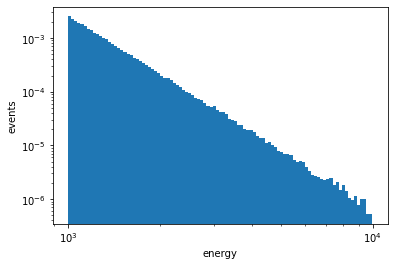

In [102]:
plt.hist(energy_mean,bins=np.logspace(np.log10(np.amin(energy_3)),np.log10(np.amax(energy_3)),bin_number) , density=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('energy')
plt.ylabel('events')
#plt.savefig('energy_IFAE.png')
plt.show()

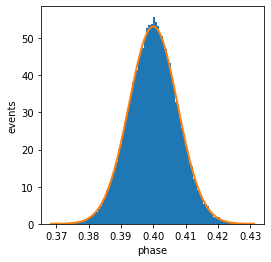

In [103]:
plt.figure(figsize=(4, 4))
count, bins, ignored = plt.hist(pulse_mean, bin_number, density=True)
#count, bins, ignored = plt.hist(pulse_1, bin_number, density=True)
#count, bins, ignored = plt.hist(pulse_2, bin_number, density=True)
#count, bins, ignored = plt.hist(pulse_3, bin_number, density=True)
gaussian_fit= 1/(sigma * np.sqrt(2*np.pi)) * np.exp(- (bins - mu)**2 / (2*sigma**2) )
plt.plot(bins, gaussian_fit, linewidth=2)
plt.xlabel('phase')
plt.ylabel('events')
#plt.xlim(-0.,1.)
#plt.savefig('pulse_IFAE.png')
plt.show()

In [16]:
#df_data=pd.DataFrame({'Phase': pulse}) 
#df_data['Energy']=energy
#df_data_Ecut_10to3=df_data[(df_data['Energy'] >= 10**19)]

#df_data_Ecut_10to3

In [104]:
line_linear_sublum_planck=line+phaseshift_linear(distance,spin_period,1.220890*planck_scale,energy_0)
line_linear_superlum_planck=line-phaseshift_linear(distance,spin_period,1.220890*planck_scale,energy_0)
line_quadratic_sublum_planck=line+phaseshift_quadratic(distance,spin_period,1.220890*planck_scale,energy_0)
line_quadratic_superlum_planck=line-phaseshift_quadratic(distance,spin_period,1.220890*planck_scale,energy_0)

line_linear_sublum_diffE=line+phaseshift_linear(2,0.0033,1.220890*energy_scale,energy_1)
line_linear_superlum_diffE=line-phaseshift_linear(2,0.0033,1.220890*energy_scale,energy_1)
line_quadratic_sublum_diffE=line+phaseshift_linear(2,0.0033,1.220890*energy_scale,energy_1)
line_quadratic_superlum_diffE=line-phaseshift_linear(2,0.0033,1.220890*energy_scale,energy_1)

In [105]:
pulse_linear_sublum_planck=pulse_0+phaseshift_linear(distance,spin_period,1.220890*planck_scale,energy_0)
pulse_linear_superlum_planck=pulse_0-phaseshift_linear(distance,spin_period,1.220890*planck_scale,energy_0)
pulse_quadratic_sublum_planck=pulse_0+phaseshift_quadratic(distance,spin_period,1.220890*planck_scale,energy_0)
pulse_quadratic_superlum_planck=pulse_0-phaseshift_quadratic(distance,spin_period,1.220890*planck_scale,energy_0)

pulse_linear_sublum_diffE=pulse_1+phaseshift_linear(2,0.033,1.220890*energy_scale,energy_1)
pulse_linear_superlum_diffE=pulse_1-phaseshift_linear(2,0.033,1.220890*energy_scale,energy_1)
pulse_quadratic_sublum_diffE=pulse_1+phaseshift_linear(2,0.033,1.220890*energy_scale,energy_1)
pulse_quadratic_superlum_diffE=pulse_1-phaseshift_linear(2,0.033,1.220890*energy_scale,energy_1)

Text(0, 0.5, 'energy')

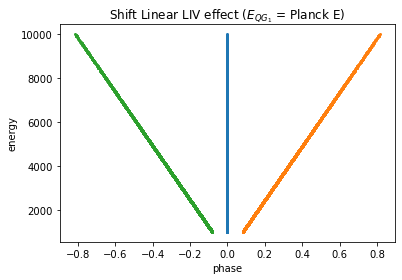

In [146]:

plt.plot(line,energy_0,'o',markersize=2)
plt.plot(line_linear_sublum_planck,energy_0,'o',markersize=2)
plt.plot(line_linear_superlum_planck,energy_0,'o',markersize=2)

plt.title("Shift Linear LIV effect ($E_{QG_1}$ = Planck E)")
plt.xlabel('phase')
plt.ylabel('energy')

#plt.xlim(-0.010,0.010)
#plt.ylim(0,20000)

Text(0.5, 1.0, 'Shift Quadratic LIV effect ($E_{QG_1}$ = Planck E)')

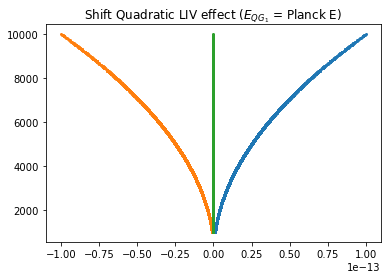

In [147]:
plt.plot(line_quadratic_sublum_planck,energy_0,'o',markersize=2)
plt.plot(line_quadratic_superlum_planck,energy_0,'o',markersize=2)
plt.plot(line,energy_0,'o',markersize=2)
plt.title("Shift Quadratic LIV effect ($E_{QG_1}$ = Planck E)")

In [21]:
#plt.hist2d(df_data['Phase'],df_data['Energy'], 1000, norm=colors.LogNorm())
#plt.hist2d(df_data_Ecut_10to7['Phase'],df_data_Ecut_10to7['Energy'],100, norm=colors.LogNorm())

#plt.plot(df_data['Phase'],'o', color='darkorange', markersize=2)
#plt.xlim(-0.001,0.001)
#plt.ylim(400,10000)
#plt.xlim(-0.001,0.001)
#plt.yscale('log')

<ipython-input-148-a2054d487241>:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,2*10**4)


(1000.0048282055299, 20000)

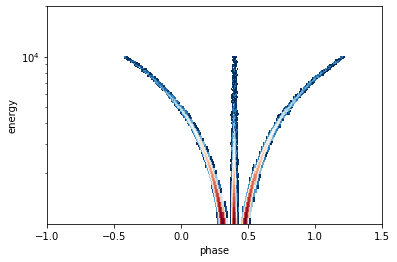

In [148]:


plt.hist2d(pulse_0,energy_0,100, norm=colors.LogNorm(),cmap='RdBu_r')

#plt.figure(figsize=(7, 17))
plt.hist2d(pulse_linear_sublum_planck,energy_0, 100, norm=colors.LogNorm(),cmap='RdBu_r')
plt.hist2d(pulse_linear_superlum_planck,energy_0, 100, norm=colors.LogNorm(),cmap='RdBu_r')

plt.xlim(-1.,1.5)
plt.yscale('log')
plt.xlabel('phase')
plt.ylabel('energy')
#plt.savefig('linear_msp_sub super.png')
#plt.show()
plt.ylim(0,2*10**4)

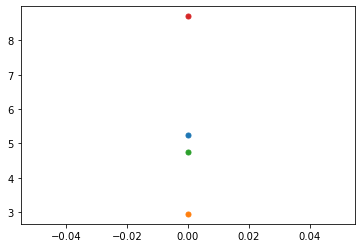

In [33]:
plt.plot(np.average(data_radiocatalog_1[7]),'o', markersize=5)
plt.plot(np.average(data_radiocatalog_3[7]),'o', markersize=5)
plt.plot(np.average(data_radiocatalog_2[7]),'o', markersize=5)
plt.plot(np.average(data_radiocatalog_4[7]),'o', markersize=5)
#plt.plot(data_radiocatalog_4[7],'o', markersize=2)
#plt.hist(data_radiocatalog_1[7],10)
#plt.hist(data_radiocatalog_3[7],10)
#plt.hist(data_radiocatalog_2[7],10)
#plt.xscale('log')
#plt.yscale('log')

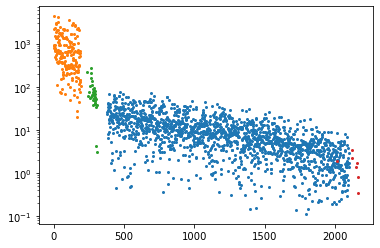

In [34]:
plt.plot(data_radiocatalog_1[7]/data_radiocatalog_1[1], 'o', markersize=2)
plt.plot(data_radiocatalog_3[7]/data_radiocatalog_3[1], 'o', markersize=2)
plt.plot(data_radiocatalog_2[7]/data_radiocatalog_2[1], 'o', markersize=2)
plt.plot(data_radiocatalog_4[7]/data_radiocatalog_4[1], 'o', markersize=2)
plt.yscale('log')
#plt.xscale('log')

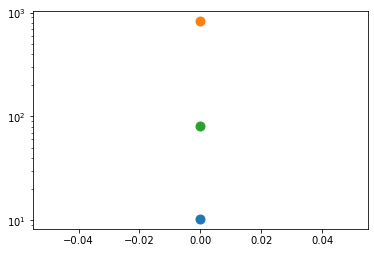

In [35]:
plt.plot(np.average(data_radiocatalog_1[7]/data_radiocatalog_1[1]), 'o', markersize=9)
plt.plot(np.average(data_radiocatalog_3[7]/data_radiocatalog_3[1]), 'o', markersize=9)
plt.plot(np.average(data_radiocatalog_2[7]/data_radiocatalog_2[1]), 'o', markersize=9)
#plt.plot(np.average(data_radiocatalog_4[7]/data_radiocatalog_4[1]), 'o', markersize=9)
plt.yscale('log')

In [38]:
c = 299792458

def lambda_linear_sub(pulse_,energy_,mean,distance_pulsar,period_pulsar):
    lambda_linear_sub=0
    c_1=distance_pulsar*3.086/(c*period_pulsar)
    for i in range(number_of_events):
        lambda_linear_sub=lambda_linear_sub+(pulse_[i]-mean)/(energy_[i]*c_1)
    return lambda_linear_sub

def lambda_linear_sup(pulse_,energy_,mean,distance_pulsar,period_pulsar):
    lambda_linear_sup=0
    c_1=distance_pulsar*3.086/(c*period_pulsar)
    for i in range(number_of_events):
        lambda_linear_sup=lambda_linear_sup-(pulse_[i]-mean)/(energy_[i]*c_1)
    return lambda_linear_sup

        
def D_linear_sub(pulse_, energy_, sigma_, mean,distance_pulsar, period_pulsar,lambda_linear_sub_):
    c_1=distance_pulsar*3.086/(c*period_pulsar)
    f=0.0
    for i in range(number_of_events):
        f=f+np.sum((pulse_[i]-mean-c_1*lambda_linear_sub_*energy_[i])**2-(pulse_[i]-mean)**2)
    D=decimal.Decimal(f/sigma**2)
    return (D)

def D_linear_sup(pulse_, energy_, sigma_, mean,distance_pulsar, period_pulsar,lambda_1):
    f=0.0
    c_1=distance_pulsar**3.086/(c*period_pulsar)
    for i in range(number_of_events):
        f=f+np.sum((pulse_[i]+mean-c_1*lambda_1*energy_[i])**2-(pulse_[i]-mean)**2)
    D=decimal.Decimal(f/sigma**2)
    return (D)

def lambda_quad_sub(pulse_,energy_,mean,distance_pulsar,period_pulsar):
    lambda_quad_sub=0
    c_2=1.5*distance_pulsar*3.086*10**(-5)/(c*period_pulsar)
    for i in range(number_of_events):
        lambda_quad_sub=lambda_quad_sub+(pulse_[i]-mean)/((energy_[i]**2)*c_2)
    return lambda_quad_sub


def D_quad_sub(pulse_, energy_, sigma_, mean,distance_pulsar, period_pulsar,lambda_quad_sub_):
    c_2=1.5*distance_pulsar*3.086*10**(-5)/(c*period_pulsar)
    f=0.0
    for i in range(number_of_events):
        f=f+np.sum(-2*(pulse_[i]-mean)*c_2*(lambda_quad_sub_**2)*energy_[i]**2+(c_2**2)*(lambda_quad_sub_**4)*energy_[i]**4)
    D=decimal.Decimal(f/sigma**2)
    return (D)

def D_quad_sup(pulse_, energy_, sigma_, mean,distance_pulsar, period_pulsar,lambda_quad_sub_):
    c_2=1.5*distance_pulsar*3.086*10**(-5)/(c*period_pulsar)
    f=0.0
    for i in range(number_of_events):
        f=f+np.sum(+2*(pulse_[i]-mean)*c_2*(lambda_quad_sub_**2)*energy_[i]**2+(c_2**2)*(lambda_quad_sub_**4)*energy_[i]**4)
    D=decimal.Decimal(f/sigma**2)
    return (D)